In [1]:
import pandas as pd
ds = pd.read_csv("data sinopsis.csv")

import re

sentence = []

for i in range (len(ds['Sinopsis'])) :
    text = ds['Sinopsis'][i]
    text = text.replace('\n', '')
    sentences = re.split('\. |\.',text)
    sentence.append(sentences)

ds['Sentence'] = sentence


PREPROCESSING
-Tokenizing

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

tokenize = []

for i in range (len(ds['Sentence'])) :
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenized = [tokenizer.tokenize(s.lower()) for s in ds['Sentence'][i]]
    tokenize.append(tokenized)
ds['Tokenize'] = tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


STOPWORDS REMOVAL

In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')

listStopword =  set(stopwords.words('english'))
listStopword

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
important = []
removed = []

for i in range (len(ds['Tokenize'])) :
  important_token = []
  for sent in ds['Tokenize'][i] :
    filtered = [s for s in sent if s not in listStopword]
    important_token.append(filtered)
  important.append(important_token)
  sw_removed = [' '.join(t) for t in important_token]
  removed.append(sw_removed)

ds['Important'] = important
ds['Removed'] = removed

STEMMING

In [5]:
import nltk
from nltk.stem import PorterStemmer

stemmed = []

for i in range (len(ds['Removed'])) :
    stemmer = PorterStemmer()
    stemmed_sent = [stemmer.stem(sentence) for sentence in ds['Removed'][i]]
    stemmed.append(stemmed_sent)
ds['Stemmed'] = stemmed

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = []

for i in range (len(ds['Stemmed'])) :
    vec = TfidfVectorizer(lowercase=True)
    document = vec.fit_transform(ds['Stemmed'][i])
    documents.append(document)
ds['Documents'] = documents

In [7]:
import numpy as np

n = 0
hasil_ringkasan = []
x = []

for i in range (len(ds['Documents'])) :
  
  if len(ds['Sentence'][i]) <= 10 :
    n = 3
  elif len(ds['Sentence'][i]) >= 11 and len(ds['Sentence'][i]) <= 12 :
    n = 4
  elif len(ds['Sentence'][i]) >= 13 and len(ds['Sentence'][i]) <= 14 :
    n = 5    
  elif len(ds['Sentence'][i]) >= 15 and len(ds['Sentence'][i]) <= 16 :
    n = 6
  elif len(ds['Sentence'][i]) >= 17 and len(ds['Sentence'][i]) <= 20 :
    n = 7
  elif len(ds['Sentence'][i]) >= 21 and len(ds['Sentence'][i]) <= 23 :
    n = 8
  elif len(ds['Sentence'][i]) >= 24 and len(ds['Sentence'][i]) <= 30 :
    n = 9
  elif len(ds['Sentence'][i]) >= 31 :
    n = 10

  x.append(len(ds['Sentence'][i]))
  print(len(ds['Sentence'][i]))
  print(n)

  document = ds['Documents'][i].toarray()
  result = np.sum(document, axis=1)
  result.shape

  sorted(result)

  top_n = np.argsort(result)[-n:]
  # print(top_n)

  summ_index = sorted(top_n)
  # print(summ_index)

  # print('Hasil Ringkasan: ')
  arr = []
  for j in summ_index:
    arr.append(ds['Sentence'][i][j])
  string = ". ".join(str(x) for x in arr)
  hasil_ringkasan.append(string)
ds['Hasil Ringkasan'] = hasil_ringkasan
ds.to_csv('Hasil ringkasan.csv')

11
4
11
4
17
7
17
7
20
7
17
7
14
5
21
8
20
7
20
7
27
9
28
9
28
9
22
8
23
8
25
9
19
7
28
9
21
8
14
5
24
9
19
7
25
9
25
9
18
7
21
8
21
8
20
7
15
6
15
6
21
8
26
9
20
7
9
3
24
9
23
8
15
6
19
7
20
7
20
7
26
9
18
7
13
5
19
7
29
9
23
8
28
9
18
7
25
9
31
10
25
9
18
7
22
8
17
7
43
10
22
8
21
8
17
7
17
7
19
7
25
9
21
8
29
9
21
8
19
7
19
7
22
8
49
10
15
6
29
9
21
8
28
9
32
10
21
8
14
5
17
7
27
9
26
9
14
5
24
9
13
5
17
7
16
6
25
9
21
8
21
8
23
8
17
7
18
7
21
8
12
4
31
10
22
8
15
6
28
9
11
4
10
3
18
7
15
6
22
8
26
9
17
7
20
7
14
5
19
7
20
7
17
7
20
7
30
9
16
6
13
5
25
9
16
6
17
7
16
6
19
7
24
9
12
4
16
6
16
6
10
3
20
7
7
3
18
7
18
7
17
7
19
7
10
3
16
6
22
8
12
4
15
6
16
6
16
6
16
6
12
4
11
4
29
9
12
4
14
5
7
3
28
9


In [8]:
import pandas as pd
from rouge import Rouge

dt = pd.read_csv("Hasil ringkasan.csv")
ds = pd.read_csv("data analisis hasil ringkasan.csv", delimiter=",")


# Inisialisasi objek ROUGE
rouge = Rouge()

scores = []
# Menghitung ROUGE-N (unigram, bigram, trigram) 
for i in range (len(dt['Hasil Ringkasan'])) :
    hypothesis = dt['Hasil Ringkasan'][i]
    reference = ds['Hasil Ringkasan Manusia'][i]
    scores.append(rouge.get_scores(hypothesis, reference))


# Hasil ROUGE-N akan menghasilkan nilai precision, recall, dan F1-score
ds['score rouge'] = scores

scores = []
# Menghitung ROUGE-N (unigram, bigram, trigram) 
for i in range (len(dt['Hasil Ringkasan'])) :
    hypothesis = dt['Hasil Ringkasan'][i]
    reference = ds['Hasil ringkasan Web'][i]
    scores.append(rouge.get_scores(hypothesis, reference))


# Hasil ROUGE-N akan menghasilkan nilai precision, recall, dan F1-score
ds['score rouge web'] = scores
ds.to_csv('hasil rouge.csv')

In [9]:
n = 0
p = 0
p1 = 0
p2 = 0
r = 0
r1 = 0
r2 = 0
rouge1 = 0
rouge2 = 0

for i in range (len(ds['score rouge'])) :
    n += ds['score rouge'][i][0]["rouge-l"]["f"]
mean = n/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    rouge1 += ds['score rouge'][i][0]["rouge-1"]["f"]
mean1 = rouge1/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    rouge2 += ds['score rouge'][i][0]["rouge-2"]["f"]
mean2 = rouge2/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    p += ds['score rouge'][i][0]["rouge-l"]["p"]
meanp = p/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    p1 += ds['score rouge'][i][0]["rouge-1"]["p"]
meanp1 = p1/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    p2 += ds['score rouge'][i][0]["rouge-2"]["p"]
meanp2 = p2/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    r += ds['score rouge'][i][0]["rouge-l"]["r"]
meanr = r/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    r1 += ds['score rouge'][i][0]["rouge-1"]["r"]
meanr1 = r1/len(ds['score rouge'])

for i in range (len(ds['score rouge'])) :
    r2 += ds['score rouge'][i][0]["rouge-2"]["r"]
meanr2 = r2/len(ds['score rouge'])

print('RATA_RATA SCORE ROUGE')
print('rata-rata rouge-1 f-1 score')
print(mean1)
print('rata-rata rouge-2 f-1 score')
print(mean2)
print('rata-rata rouge-l f-1 score')
print(mean)
print('rata-rata precission rouge-1')
print(meanp1)
print('rata-rata precission rouge-2')
print(meanp2)
print('rata-rata precission rouge-l')
print(meanp)
print('rata-rata recall rouge-1')
print(meanr1)
print('rata-rata recall rouge-2')
print(meanr2)
print('rata-rata recall rouge-l')
print(meanr)

RATA_RATA SCORE ROUGE
rata-rata rouge-1 f-1 score
0.47566682472282795
rata-rata rouge-2 f-1 score
0.2654903947372555
rata-rata rouge-l f-1 score
0.45371001094518965
rata-rata precission rouge-1
0.38963970783828
rata-rata precission rouge-2
0.21228317627551968
rata-rata precission rouge-l
0.37172843229074637
rata-rata recall rouge-1
0.6207382150963303
rata-rata recall rouge-2
0.36355241403231386
rata-rata recall rouge-l
0.5920809218795011


In [10]:
n = 0
p = 0
p1 = 0
p2 = 0
r = 0
r1 = 0
r2 = 0
rouge1 = 0
rouge2 = 0

for i in range (len(ds['score rouge web'])) :
    n += ds['score rouge web'][i][0]["rouge-l"]["f"]
mean = n/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    rouge1 += ds['score rouge web'][i][0]["rouge-1"]["f"]
mean1 = rouge1/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    rouge2 += ds['score rouge web'][i][0]["rouge-2"]["f"]
mean2 = rouge2/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    p += ds['score rouge web'][i][0]["rouge-l"]["p"]
meanp = p/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    p1 += ds['score rouge web'][i][0]["rouge-1"]["p"]
meanp1 = p1/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    p2 += ds['score rouge web'][i][0]["rouge-2"]["p"]
meanp2 = p2/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    r += ds['score rouge web'][i][0]["rouge-l"]["r"]
meanr = r/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    r1 += ds['score rouge web'][i][0]["rouge-1"]["r"]
meanr1 = r1/len(ds['score rouge web'])

for i in range (len(ds['score rouge web'])) :
    r2 += ds['score rouge web'][i][0]["rouge-2"]["r"]
meanr2 = r2/len(ds['score rouge web'])

print('RATA_RATA SCORE ROUGE WEB')
print('rata-rata rouge-1 f-1 score')
print(mean1)
print('rata-rata rouge-2 f-1 score')
print(mean2)
print('rata-rata rouge-l f-1 score')
print(mean)
print('rata-rata precission rouge-1')
print(meanp1)
print('rata-rata precission rouge-2')
print(meanp2)
print('rata-rata precission rouge-l')
print(meanp)
print('rata-rata recall rouge-1')
print(meanr1)
print('rata-rata recall rouge-2')
print(meanr2)
print('rata-rata recall rouge-l')
print(meanr)

RATA_RATA SCORE ROUGE WEB
rata-rata rouge-1 f-1 score
0.4993927336140659
rata-rata rouge-2 f-1 score
0.27979356886398515
rata-rata rouge-l f-1 score
0.4782165699501816
rata-rata precission rouge-1
0.4244918926882348
rata-rata precission rouge-2
0.23212536709774423
rata-rata precission rouge-l
0.40648333689479865
rata-rata recall rouge-1
0.6147562324302981
rata-rata recall rouge-2
0.35848238758494183
rata-rata recall rouge-l
0.588740909829239


In [11]:
score_rouge = []
for i in range (len(ds['score rouge'])) :
    score_rouge.append(ds['score rouge'][i][0]["rouge-l"]["f"])
ds['score rouge fmeasure'] = score_rouge
print('nilai tertinggi R-L : ')
ds["score rouge fmeasure"].nlargest(3)

nilai tertinggi R-L : 


24     0.746479
124    0.608187
131    0.602410
Name: score rouge fmeasure, dtype: float64

In [12]:
print('nilai terendah R-L : ')
ds["score rouge fmeasure"].nsmallest(3)

nilai terendah R-L : 


55     0.284314
43     0.302222
140    0.302521
Name: score rouge fmeasure, dtype: float64

In [13]:
score_rouge1 = []
for i in range (len(ds['score rouge'])) :
    score_rouge1.append(ds['score rouge'][i][0]["rouge-1"]["f"])
ds['score rouge fmeasure'] = score_rouge1
print('nilai tertinggi R-1 : ')
ds["score rouge fmeasure"].nlargest(3)

nilai tertinggi R-1 : 


24     0.746479
131    0.626506
136    0.625000
Name: score rouge fmeasure, dtype: float64

In [14]:
print('nilai terendah R-1 : ')
ds["score rouge fmeasure"].nsmallest(3)

nilai terendah R-1 : 


140    0.302521
93     0.323944
75     0.330000
Name: score rouge fmeasure, dtype: float64

In [15]:
score_rouge2 = []
for i in range (len(ds['score rouge'])) :
    score_rouge2.append(ds['score rouge'][i][0]["rouge-2"]["f"])
ds['score rouge fmeasure'] = score_rouge2
print('nilai tertinggi R-2 : ')
ds["score rouge fmeasure"].nlargest(3)

nilai tertinggi R-2 : 


24     0.72770
124    0.46087
46     0.42233
Name: score rouge fmeasure, dtype: float64

In [16]:
print('nilai terendah R-2 : ')
ds["score rouge fmeasure"].nsmallest(3)

nilai terendah R-2 : 


43     0.112426
34     0.126984
140    0.135135
Name: score rouge fmeasure, dtype: float64

In [17]:
score_rouge = []
for i in range (len(ds['score rouge web'])) :
    score_rouge.append(ds['score rouge web'][i][0]["rouge-l"]["f"])
ds['score rouge fmeasure web'] = score_rouge
print('nilai tertinggi R-L : ')
ds["score rouge fmeasure web"].nlargest(3)

nilai tertinggi R-L : 


126    0.719665
122    0.635514
17     0.628571
Name: score rouge fmeasure web, dtype: float64

In [18]:
print('nilai terendah R-L : ')
ds["score rouge fmeasure web"].nsmallest(3)

nilai terendah R-L : 


54    0.259740
66    0.284314
93    0.304348
Name: score rouge fmeasure web, dtype: float64

In [19]:
score_rouge1 = []
for i in range (len(ds['score rouge web'])) :
    score_rouge1.append(ds['score rouge web'][i][0]["rouge-1"]["f"])
ds['score rouge fmeasure web'] = score_rouge1
print('nilai tertinggi R-1 : ')
ds["score rouge fmeasure web"].nlargest(3)

nilai tertinggi R-1 : 


126    0.719665
122    0.654206
17     0.653968
Name: score rouge fmeasure web, dtype: float64

In [20]:
print('nilai terendah R-1 : ')
ds["score rouge fmeasure web"].nsmallest(3)

nilai terendah R-1 : 


54    0.266234
66    0.294118
93    0.304348
Name: score rouge fmeasure web, dtype: float64

In [21]:
score_rouge2 = []
for i in range (len(ds['score rouge web'])) :
    score_rouge2.append(ds['score rouge web'][i][0]["rouge-2"]["f"])
ds['score rouge fmeasure web'] = score_rouge2
print('nilai tertinggi R-2 : ')
ds["score rouge fmeasure web"].nlargest(3)

nilai tertinggi R-2 : 


126    0.600000
123    0.466019
17     0.460526
Name: score rouge fmeasure web, dtype: float64

In [22]:
print('nilai terendah R-2 : ')
ds["score rouge fmeasure web"].nsmallest(3)

nilai terendah R-2 : 


54    0.097345
66    0.123636
93    0.128205
Name: score rouge fmeasure web, dtype: float64

In [23]:
print(ds["score rouge fmeasure web"])

0      0.306011
1      0.318182
2      0.310954
3      0.178571
4      0.360577
         ...   
137    0.398169
138    0.261438
139    0.382775
140    0.186335
141    0.254545
Name: score rouge fmeasure web, Length: 142, dtype: float64


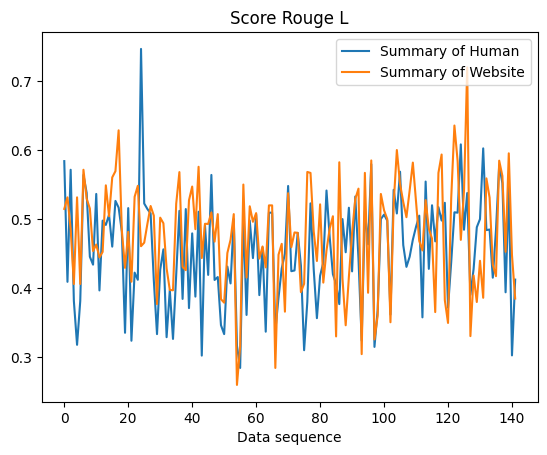

In [24]:
import matplotlib.pyplot as plt

score_rouge1 = []
score_rouge2 = []

for i in range (len(ds['score rouge'])) :
    score_rouge1.append(ds['score rouge'][i][0]["rouge-l"]["f"])


for i in range (len(ds['score rouge web'])) :
    score_rouge2.append(ds['score rouge web'][i][0]["rouge-l"]["f"])


# Membuat grafik garis
plt.plot(score_rouge1, label ='Summary of Human')
plt.plot(score_rouge2, label ='Summary of Website')

plt.legend()
plt.legend(loc='upper right')  

# Menambahkan label sumbu
plt.xlabel('Data sequence')


# Menambahkan judul grafik
plt.title('Score Rouge L')

plt.savefig('PerbandinganRL.png', dpi=300, bbox_inches='tight')

# Menampilkan grafik
plt.show()


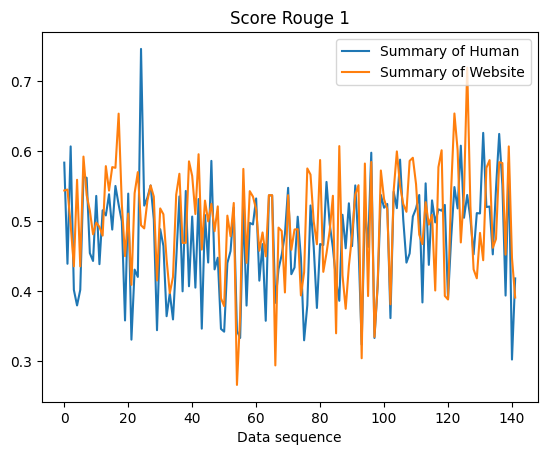

In [25]:
import matplotlib.pyplot as plt

score_rouge3 = []
score_rouge4 = []

for i in range (len(ds['score rouge'])) :
    score_rouge3.append(ds['score rouge'][i][0]["rouge-1"]["f"])


for i in range (len(ds['score rouge web'])) :
    score_rouge4.append(ds['score rouge web'][i][0]["rouge-1"]["f"])


# Membuat grafik garis
plt.plot(score_rouge3, label ='Summary of Human')
plt.plot(score_rouge4, label ='Summary of Website')

plt.legend()
plt.legend(loc='upper right')  

# Menambahkan label sumbu
plt.xlabel('Data sequence')


# Menambahkan judul grafik
plt.title('Score Rouge 1')

plt.savefig('PerbandinganR1.png', dpi=300, bbox_inches='tight')

# Menampilkan grafik
plt.show()

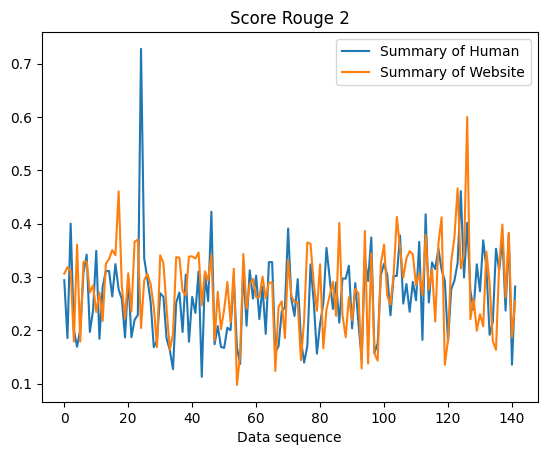

In [26]:
import matplotlib.pyplot as plt

score_rouge5 = []
score_rouge6 = []

for i in range (len(ds['score rouge'])) :
    score_rouge5.append(ds['score rouge'][i][0]["rouge-2"]["f"])


for i in range (len(ds['score rouge web'])) :
    score_rouge6.append(ds['score rouge web'][i][0]["rouge-2"]["f"])


# Membuat grafik garis
plt.plot(score_rouge5, label ='Summary of Human')
plt.plot(score_rouge6, label ='Summary of Website')

plt.legend()
plt.legend(loc='upper right')  

# Menambahkan label sumbu
plt.xlabel('Data sequence')


# Menambahkan judul grafik
plt.title('Score Rouge 2')

plt.savefig('PerbandinganR2.png', dpi=300, bbox_inches='tight')

# Menampilkan grafik
plt.show()